# Chapter 14 : 주성분 분석 모델
## 사전 지식
### 차원 축소
- 차원 축소(dimensionality reduction) : 주어진 피처 공간의 차원 수를 줄이는 기법
- 머신러닝 모델은 차원의 수에 따라 시간과 공간 복잡도가 기하급수로 증가
- 주어진 샘플 개수에 비해 차원의 수가 증가할 경우 차원의 저주(curse of dimensionality) 현상이 발생해 왜곡된 분석 결론에 도달할 수 있음
- 차원 축소는 데이터의 전처리 과정에서 주로 사용
- 차원 수를 감소하는 과정에서 정보 손실은 불가피한 일
- 핵심 : 최대한 정보의 손실을 적게 하며 차원의 수를 감소하는 것  
<br><br>
- 피처 선택법(feature selection) : 전체 피처의 집합에서 일부 부분 집합을 선택하는 방법
    - 분석 데이터세 대한 도메인 지식(domain knowledge)을 활용해 특정 피처를 선택하거나 배제
    - 필터(filter), 래퍼(wrapper), 임베디드(embedded) 등 머신러닝 방법론을 이용하여 피처를 선택
- 피처 추출법(feature extraction) : 주어진 데이터의 정보를 최대한 보존하는 새로운 피처 조합을 생성하는 방법
    - 주어진 피처보다 적은 수의 피처를 얻지만, 얻은 각 피처는 주어졌던 피처와는 다른 값을 가짐
    - PCA, 다차원 척도법(multidimensional Scaling, MDS), Isomap, LLE(locally linear embedding), t-SNE(t-distributed stochastic neighbor embedding)
    - EFA(explanatory factor analysis), CFA(confirmatory factor analysis) 요인 분석(factor analysis) 기법 : 사회 과학 영역에서 사용

## 1. 주성분 분석 모델이란?
- 주성분 분석(principal component analysis, PCA) : 차원 축소를 위한 비지도 학습 모델
- 원 데이터가 가진 전체 정보를 최대한 훼손하지 않는 범위에서 차원을 축소
- 상관성이 높은 피처를 이용해 새로운 피처를 생성하는 것
- 원 데이터에서 분산이 높은 부분(방향)은 최대한 유지, 분산이 낮은 부분은 들어내는 방향으로 분석을 진행
- 원 데이터의 분산을 최대한 보존하면 차원을 축소
- 변수 간의 공분산 행렬을 분석  
<br><br>
- 원 데이터 공간에서 분산이 가장 커지는 축 : 첫 번째 주성분 축
- 첫 번째 축에서 수직인 차원 공간 중 분산이 두 번째로 커지는 축 : 두 번째 주성분 축
- 필요한 주성분의 수만큼 반복
- 새로운 피처 : 원래 피처를 선형 결합하여 얻을 수 있음 $\rightarrow$ 주성분(principal component)
- 선형 차원 축소 기법

## 2. 주성분 분석 모델 구현하기
### 주성분 분석 모델의 이론
- PCA : 차원 축소(dimensionality reduction) 기법의 하나
- 다차원 데이터셋을 데이터 분포의 분산이 큰 순으로 구성한 일련의 새로운 성분으로 분해(decompose)하는 기법
- 결과로 얻은 성분 : 기존 피처의 선형 결합으로 정의  
$PC_1 = w_{11}X_1 + w_{12}X_2 + \dots + w_{1p}X_p$  
$PC_2 = w_{21}X_1 + w_{22}X_2 + \dots + w_{2p}X_p$  
$\qquad \qquad \qquad \dots$  
$PC_p = w_{p1}X_1 + w_{p2}X_2 + \dots + w_{pp}X_p$  

- 새로운 성분 : 선형적으로 서로 상관성이 없어짐 $\rightarrow$ 수직(orthogonal)인 관계  
<br><br>
- 피처 공분산 행렬(covariance matrix)의 고윳값 분해(eigen-decomposition)을 이용한 방법 : PCA를 수행하는 가장 간단한 방법
- 피처 개수 $p$, 샘플 개수 $n$ $\rightarrow$ 피처 행렬 $X$ : $p$x$n$의 전치(transpose)된 형태
- 평균 중심화(mean centering)를 통해 평균은 0으로 변경했다고 가정
- $X$의 공분산 행렬 $S$  
$S = Cov(X) = \frac{1}{n}(X - \bar{X})(X = \bar{X})^T = \frac{1}{n}XX^T$  
    - 공분산 행렬 $S$ : $p$x$p$ 차원  
<br><br>
- 크기가 1인 선형 결합 연산자 $w \in \mathbb{R}^p$를 적용 $\rightarrow$ 변환한 벡터 $w^TX$의 분산 $V$  
$V = \frac{1}{n}(w^TX)(w^TX)^T = \frac{1}{n}w^TXX^Tw = w^TSw$  
<br><br>
- PCA가 해결하고자 하는 문제 : $w^Tw = 1$의 제약 조건에서 분산 $V = w^TSw$를 최대화하는 것
- 라그랑주 승수법(Lagrange multiplier method)을 적용
- 라그랑주 승수법에서 $L$  
$L = w^TSw - \lambda(w^Tw - 1)$  
- 최적해가 되기 위한 필요조건 : $L$에 대한 $w$의 편미분 값이 0이 되어야 함  
$\frac{\partial L}{\partial w} = 0 \quad \rightarrow \quad Sw - \lambda w = 0 \quad \rightarrow \quad (S - \lambda I)w = 0$  
- $S$의 고윳값(eigenvalue)과 고유 벡터(eigenvector)를 찾는 문제로 귀결됨
- $S$의 고유 벡터 : $S$에 의한 선형 변환을 취했을 경우 방향은 변하지 않고 크기만 변하는 벡터
- $S$의 고윳값 : 고유 벡터에에 해당하는 크기의 변화량 계수  
<br><br>
- $p$x$p$ 행렬 $S$가 특이 행렬이 아닌 정칙 행렬(non-singluar matrix)이면 $(\lambda_1, w_1), \dots, (\lambda_p, w_p)$ 등 $p$개의 고윳값과 고유 벡터 쌍이 존재, 각각의 고유 벡터는 서로 직교(orthogonal)
- $i \neq j$일 경우 $w_i^Tw_j = 0$이 성립
- $X$가 완전 다중공선성이 없는 풀 칼럼 랭크 행렬이라 가정
- $S$는 특이 행렬이 아니고 $p$개의 고윳값과 고유 벡터의 쌍이 존재
- $p$개의 고유 벡터가 새로운 주성분을 이루며, 각각의 주성분이 설명하는 원 데이터의 분산은 $\lambda_j$
- 한 해를 $(\lambda_j, w_j)$라 가정
- $Sw_j = \lambda_jw_j$이므로 양변의 왼쪽에 $w_j^T$를 곱합  
$w_j^TSw_j = w_j^T\lambda_jw_j = \lambda_jw_j^Tw_j = \lambda_j$  
- 주성분 $w_j$에 의해 투영된 데이터는 $\lambda_j$만큼의 분산을 가짐
- 주성분에 의한 투영은 전체 데이터 분산의 $\frac{\lambda_j}{\sum_{j = 1}^{p} \lambda_j}$만큼 설명  
<br><br>
- 피처 공분산 행렬의 고윳값과 고유 벡터를 구하면 주성분을 구할 수 있음
- 공분산 행렬에 고윳값 분해를 적용하면 간단히 구할 수 있음
- 구한 고윳값과 고유 벡터의 쌍을 고윳값의 내림차순으로 정렬한 후 일정 임계값 밑의 고윳값과 고유 벡터의 쌍을 제거하여 분포를 근사
- 피처 행렬에 특잇값 분해(SVD)를 적용하는 방법으로 PCA를 수행할 수도 있음 (고윳값 분해를 이용한 방법과 거의 동일한 결과)

### PCA 모델 구현하기
- 피처 공분산 행렬의 고윳값 분해(eigen-decomposition)를 이용한 방법과 SVD를 이용한 방법을 각각 적용하여 PCA를 수행하는 방법을 구현하고 비교
- 데이터셋은 붓꽃 데이터셋 사용

#### 고윳값 분해를 이용한 방법
- 피처의 공분산 행렬을 구한 후 고윳값 분해를 적용하는 방법을 통하여 PCA를 수행하는 방법을 구현

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X, y = load_iris(return_X_y = True)

- PCA는 각 피처의 평균이 0이라고 가정
- 피처 행렬에 평균 중심화(mean centering)를 적용
- 고윳값 분해를 수행하고 고윳값이 작아지는 순으로 고윳값 행렬과 고유 벡터 행렬을 정렬

In [2]:
X_centered = X - np.mean(X, axis = 0)
X_cov = np.cov(X_centered.T)
eigenvalue, eigenvector = np.linalg.eigh(X_cov)

ind = np.argsort(eigenvalue)[::-1]
eigenvalue_sorted = eigenvalue[ind]
eigenvector_sorted = eigenvector[:, ind]

- 얻은 고유 벡터를 통하여 피처의 차원을 축소
- PCA 표현을 구한 후 2개의 주성분만을 택해 피처 행렬을 축소
- 축소할 차원을 2로 설정
- 축소한 결과를 산점도로 표현하면 추가 통찰을 얻을 수 있음

In [3]:
num_components = 2
eigenvector_extracted = eigenvector_sorted[:, :num_components]

X_extracted_eigen = np.dot(eigenvector_extracted.transpose(), X_centered.transpose()).transpose()

print('축소된 피처 행렬의 크기 :', X_extracted_eigen.shape)
print()
print('축소된 피처 행렬의 첫 5개 샘플')
print(X_extracted_eigen[:5, :])

축소된 피처 행렬의 크기 : (150, 2)

축소된 피처 행렬의 첫 5개 샘플
[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]]


- 얻은 결과를 산점도로 나타냄

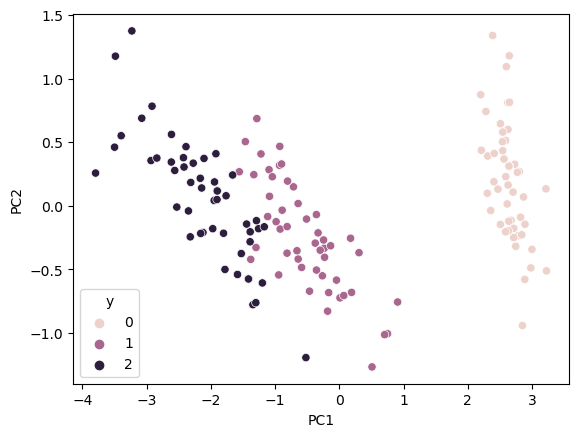

In [5]:
df = pd.DataFrame(X_extracted_eigen, columns = ['PC1', 'PC2'])
df['y'] = y

sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'y');

- 축소된 각 차원을 직관적으로 해석하기는 쉽지 않지만, 축소된 차원을 기준으로 붓꽃 데이터셋의 레이블을 분류하는 방법임
- PC1이 2 이상이라면 y를 0으로 예측하고, y가 1이거나 2라면 PC1과 PC2가 적당한 초평면(hyperplane)을 이루게끔 구성하면 높은 정확도로 분류할 수 있을 것으로 예상됨

#### SVD를 이용한 방법
- 피처에 SVD를 적용하는 방법으로 PCA를 수행
- X에 평균 중심화를 수행한 X_centered까지 주어져 있다고 가정
- svd 클래스만 불러온 후 SVD를 바로 수행

In [6]:
from numpy.linalg import svd

u, s, vh = np.linalg.svd(X_centered)

- X_centered @ vh.T를 계산하면 차원을 축소할 수 있음
- 축소할 차원은 2로 계산
- 계산 문제로 (X_centered @ vh.T)[:, :2]와 X_extracted는 반대의 방향
- 같은 부호로 비교하고자 X_extracted_svd는 -(X_centered @ vh.T)[:, :2]로 정의

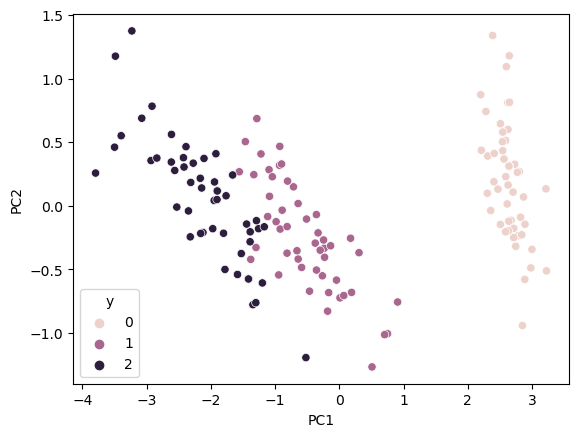

In [8]:
X_extracted_svd = -(X_centered @ vh.T)[:, :2]

df = pd.DataFrame(X_extracted_svd, columns = ['PC1', 'PC2'])
df['y'] = y

sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'y');

- 고윳값 분해를 이용한 방법과 마찬가지의 그래프 얻음
- 실제로 np.allclose() 함수를 이용하면 같은 값의 주성분을 얻었다는 것을 확인할 수 있음

In [9]:
np.allclose(X_extracted_eigen, X_extracted_svd)

True

## 3. 패키지로 표현하기
- sklearn.decomposition.PCA 클래스 : SVD에 기반을 두고 데이터를 저차원 공간으로 투영(project)하는 PCA 모델을 구현
- PCA 클래스 : SVD 이전 데이터에 대해 평균을 0으로 맞추는 평균 중심화(mean centering)는 수행하지만 기본 하이퍼파라미터 설정에서는 분포의 분산을 조정하는 스케일링(scaling)은 진행하지 않음
- $n$ : 샘플 개수
- $p$ : 피처 개수
- n_components
    - 주요값 : None, int, 0 < float < 1, 'mle'
    - 기본값 : None
    - 의미 : 추출할 주성분의 수
        - None : n_components = min($n$, $p$)가 되어 전체 정보를 보존하는 최대 주성분을 선택하지만 svd_solver = 'arpack'일 때는 주성분의 수는 $n$과 $p$보다 모두 작아야 하므로  min($n$, $p$) - 1을 선택
        - float : svd_solver = 'full'이면 전체 데이터에서 n_components이 넘는 비율의 분산이 설명될 때까지의 주성분을 추출
        - 'mle' : svd_solver가 'full'이나 'auto'이면 최대 가능도 추정(maximum likelihood estimation, MLE) 기법으로 차원의 수를 결정
- whiten
    - 주요값 : bool
    - 기본값 : False
    - 의미 : 분산 조정 여부
        - True : 각각의 components_ 벡터에 $\sqrt{n}$을 곱하고 각각의 특잇값(singular_value)을 나누어 출력 벡터의 각 분산을 1로 조정하고 출력값의 상관성을 제거
            - 해당 과정은 신호(signal)의 분산 정보를 제거하므로 일부 정보 손실이 생길 수 있으나 이를 통해 PCA 이후에 진행될 머신러닝 모델에서 성능이 증가할 수도 있음
- svd_solver
    - 주요값 : 'full', 'arpack', 'randomized', 'auto'
    - 기본값 : 'auto'
    - 의미 : 최적화 알고리즘 선택
        - 'full' : scipy.linalg.svd를 통해 LAPACK 알고리즘으로 SVD를 수행하고 주성분을 택함
        - 'arpack' : scipy.sparse.linalg.svds를 통해 ARPACK 알고리즘으로 TSVD(truncated SVD)을 통해 근사값을 찾음
            - 0 < n_components < min($n$, $p$)여야 함
        - 'randomized' : 무작위 SVD(randomized SVD)를 수행
        - 'auto' : $n$, $p$, n_components에 따라 자동으로 결정
            - 만약 입력 데이터의 차원이 500x500보다 크고 추출할 주성분 수가 min($n$, $p$)x0.8보다 작으면 'randomized'를 적용
            - 그 외는 'full'을 적용하며 때에 따라 결과에서 절삭(truncation)을 통한 근사값을 찾게 됨
- tol
    - 주요값 : float $\geq$ 0
    - 기본값 : 0.0
    - 의미 : svd_solver가 'arpack'일 때 유지할 특잇값에 대한 허용 오차(tolerance)를 설정
- iterated_power
    - 주요값 : 'auto', int $\geq$ 0
    - 기본값 : 'auto'
    - 의미 : svd_solver가 'randomized'일 때의 이터레이션 횟수
- random_state
    - 주요값 : int
    - 기본값 : None
    - 의미 : svd_solver가 'arpack'이나 'randomized'일 때 랜덤성을 제어하고자 사용

**실제 사용 시 활용 팁**
- PCA 클래스 : 자동으로 평균 중심화를 수행
    - 해당 과정은 전처리에서 수행하지 않아도 괜찮지만 whiten 하이퍼파라미터의 기본값이 False리므로 분산 스케일링은 PCA 클래스에서 이루어지지 않음
    - 해당 부분을 조심해야 하며 분산 스케일링해야 한다면 whiten을 True로 설정하거나 전처리에서 분산 스케일링해야 함
- PCA 클래스 객체는 fit() 메서드를 이용하여 $n$개의 주성분을 학습
    - 학습 후 객체는 transform() 메서드를 이용하여 테스트 데이터로 학습한 결과로 PCA를 수행할 수 있음
    - fit_transform() 메서드로 fit()과 transform() 메서드를 한 번에 적용할 수 있음

### Pipeline을 이용한 PCA와 로지스틱 회귀 모델 순차 적용하기
- 지도 학습 분제에서 주어진 피처의 차원이 매우 높다면 PCA를 우선 적용한 후 축소한 차원에 지도 학습 모델을 적용하는 방법을 고려할 수 있음
- 피처 스케일링과 PCA로 차원을 축소한 후 로지스틱 회귀 모델을 적용하는 파이프라인을 구축하고 이를 적용
- PCA의 차원을 결정하고자 GridSearchCV를 사용
- 비교적 차원이 높은 MNIST 데이터셋 사용

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

X, y = load_digits(return_X_y = True)

- 피처 스케일링, PCA, 로지스틱 회귀 분석으로 이어지는 파이프라인을 구성하고 고정할 파라미터를 먼저 입력
- 랜덤성이 발생할 수 있는 PCA와 LogisticRegression에는 random_state를 지정
- 튜토리얼 코드로 빠르게 학습하고자 LogisticRegression의 tol값을 적당히 큰 값으로 설정

In [12]:
scaler = StandardScaler()
pca = PCA(random_state = 1234)
logistic = LogisticRegression(max_iter = 10000, tol = 0.1, random_state = 1234)

pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca), ('logistic', logistic)])

- 탐색할 하이퍼파라미터를 정의하고 전체 경우의 수에 대한 그리드(grid)를 설정
- 20가지 경우의 수에 대하여 GridSearchCV를 수행하고 CV Score가 가장 높은 하이퍼파라미터 선택
- 그리드를 정의하는 prarm_grid에서 각각의 키(key)는 (객체)__ (하이퍼라라미터) 형식으로 지정해야 함

In [13]:
param_grid = {'pca__n_components' : [5, 15, 30, 45, 60],
              'logistic__C' : np.logspace(-4, 4, 4)}
search = GridSearchCV(pipe, param_grid)
search.fit(X, y)

print('Best parameter (CV score', search.best_score_, '):', search.best_params_)

Best parameter (CV score 0.9237759207675642 ): {'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


- 결과를 그래프로 나타냄

C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


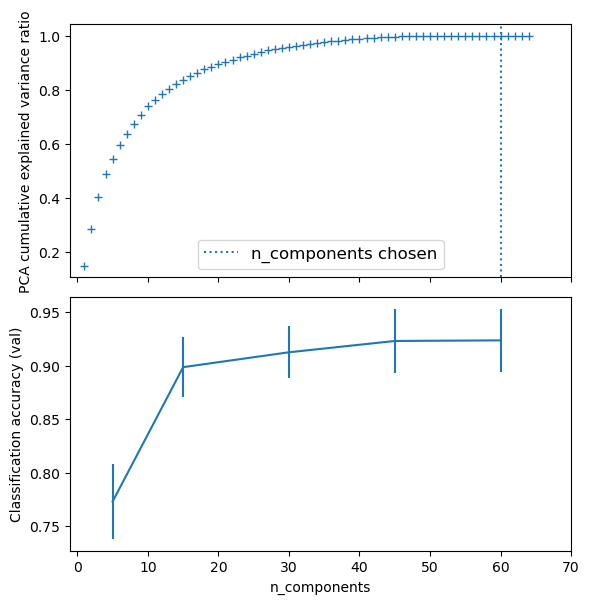

In [19]:
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), '+', linewidth = 2);
ax0.set_ylabel('PCA cumulative explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'n_components chosen');
ax0.legend(prop = dict(size = 12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'

best_clfs = results.groupby(components_col).apply(lambda g : g.nlargest(1, 'mean_test_score'))
best_clfs.plot(x = components_col,
               y = 'mean_test_score',
               yerr = 'std_test_score',
               legend = False,
               ax = ax1);

ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout();
plt.show();

## 4. 주성분 분석 모델 보충 수업
### 다양한 차원 축소 기법
- PCA에서는 원 데이터의 정보를 데이터의 분산으로 정의하여 이 분산을 최대한 유지하는 방햐으로 차원 축소를 진행
- 원 데이터의 정보는 이 외에도 다양한 방법으로 정의할 수 있음
- 원 데이터 정보를 다양한 관점에서 정의하여 차원 축소를 진행
- 패키지 표현에서 n_components 하이퍼파라미터로 축소할 차원의 수를 지정

#### 다차원 척도법
- 다차원 척도법(multidimensional scaling, MDS) : 주어진 고차원에서의 샘플 간 거리가 저차원에서도 최대한 보존되도록 변환하는 선형 차원 축소 기법
- 샘플 간의 거리를 모두 계산한 후 정보를 활용
- 샘플 $n$개, $i$번째 샘플과 $j$번째 샘플 사이의 거리 $d_{ij}$ $\rightarrow$ 거리 행렬 $D$  
$D = \begin{pmatrix}
     0 & d_{12} & \cdots & d_{1n} \\
     d_{21} & 0 & \cdots & d_{2n} \\
     \vdots & \vdots & \ddots & \vdots \\
     d_{n1} & d_{n2} & \cdots & 0 \\
     \end{pmatrix}$
- 거리 행렬을 최대한 보존하는 저차원의 좌표계를 계산
- sklearn.manifold 모듈의 MDS 클래스로 구현됨

#### Isomap
- 많은 부분에서 MDS와 비슷하지만 샘플 사이의 거리 행렬을 구하는 방법만을 달리하여 비선형 차원 축소를 수행하는 기법
- 거리 행렬을 구할 때 유클리드 거리 대신 데이터에 내재적인 매니폴드(intrinsic manifold)를 가정
- 매니폴드상에서의 거리를 최대한 보존하도록 변환을 수행
- 샘플별로 주위 샘플과의 거리를 나타내는 그래프를 구축하고 두 점 사이의 거리는 구축한 그래프에서 최단 거리를 계산하여 얻음
- 모든 샘플에 반복하여 거리 행렬을 얻은 후 MDS와 마찬가지 방식으로 차원을 축소
- sklearn.manifold.Isomap 클래스로 구현

#### LLE
- LLE(locally linear embedding) : 비선형 차원 축소 기법
- 각 샘플의 이웃(neighbor)에 대한 정보를 활용하여 차원 축소를 진행
- 각 샘플의 최근접 이웃(nearest neighbors)을 찾은 후 이웃 샘플로 해당 샘플을 근사하거나 재구성(reconstruction)
- LocallyLinearEmbedding 클래스로 구현

#### t-SNE
- t-SNE(t-distributed stochastic neighbor embedding) : 확률적으로 이웃을 선택한다고 가정
- 가까운 샘플일수록 이웃으로 선택될 확률이 높지만 거리가 먼 샘플이라도 이웃으로 선택될 확률이 있다고 봄
- 원 데이터 공간에서 한 샘플이 다른 샘플을 이웃으로 선택할 확률 분포가 저차원 공간에서도 유지되도록 차원 축소를 진행
- 쿨백-라이블러 발산(Kullback-Leibler divergence) 개념을 사용
- sklearn.manifold.TSNE 클래스로 구현

### 차원 축소 기법 사용하기
- PCA 모델을 포함해 앞서 학습한 MDS, Isomap, LLE, t-SNE 모델을 MNIST 데이터셋의 피처에 적용해 차원을 축소하고 결과를 비교
- 빠르게 실행하고자 전체 데이터의 10%만 샘플링하여 사용

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.pipeline import make_pipeline
%matplotlib inline

df = load_digits(as_frame = True)['frame'].sample(frac = 0.1, random_state = 1234)
X, y = df.drop(['target'], axis = 1), df['target']

- 각 방법의 파이프라인을 정의
- 파이프라인은 모두 표준 스케일링 이후 차원을 2로 축소하는 것으로 정의

In [25]:
pca = make_pipeline(StandardScaler(), PCA(n_components = 2, random_state = 1234))
mds = make_pipeline(StandardScaler(), MDS(n_components = 2, random_state = 1234))
isomap = make_pipeline(StandardScaler(), Isomap(n_components = 2))
lle = make_pipeline(StandardScaler(), LocallyLinearEmbedding(n_components = 2, random_state = 1234))
tsne = make_pipeline(StandardScaler(), TSNE(n_components = 2, random_state = 1234))

methods = [('PCA', pca), ('MDS', mds), ('Isomap', isomap), ('LLE', lle), ('TSNE', tsne)]

- MNIST 데이터셋의 피처에 각각의 모델을 적용하여 차원을 축소한 후 결과를 그래프로 나타냄
- 같은 색깔은 같은 클래스(같은 숫자)를 의미

C:\Users\82108\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\82108\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


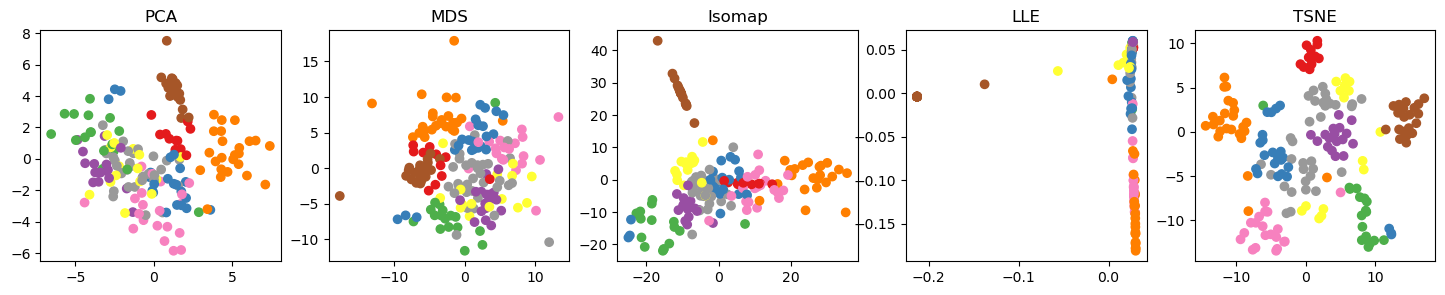

In [27]:
fig, axs = plt.subplots(1, 5, figsize = (18, 3))
for i, (name, model) in enumerate(methods):
    X_embedded = model.fit_transform(X)
    axs[i].scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, cmap = 'Set1');
    axs[i].set_title(name)

- 같은 색깔의 점들끼리 근처에 모여 있고 다른 색깔 영역까지의 거리가 멀수록 차원 축소가 성공적으로 이루어졌다고 볼 수 있음
- 해당 예제에서는 t-SNE의 성능이 가장 좋아 보임

### 되새김 문제
#### 1. PCA 클래스 적용하기
- PCA 모델을 와인 데이터셋에 적용하여 차원을 축소하고 결과를 그래프로 나타냄

In [28]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X, _ = load_wine(return_X_y = True)

- X에 표준 스케일링(standard scaling)을 적용하고 PCA 모델을 X에 적용하여 2개의 차원을 추출하고 추출한 피처를 그래프로 나타내라.

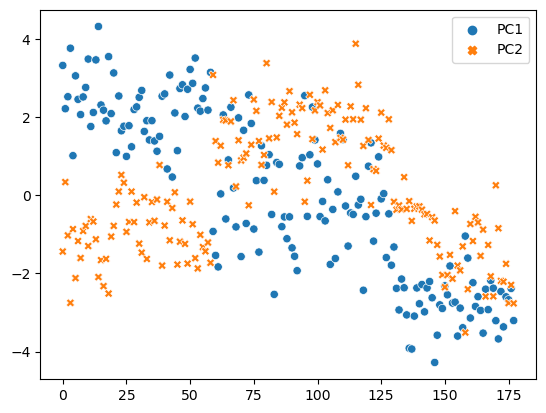

In [31]:
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2, random_state = 1234)

X_extracted = pca.fit_transform(X)
X_extracted = pd.DataFrame(X_extracted, columns = ['PC1', 'PC2'])

sns.scatterplot(data = X_extracted);

#### 2. 차원 축소 기법 비교하기
- 차원 축소 기법인 PCA, MDS, Isomap, LLE, t-SNE 결과를 비교
- 각 방법으로 주어진 데이터 차원을 축소한 후 지도 학습을 적용해 모델링을 수행하고 예측 결과를 비교

In [35]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

df = load_digits(as_frame = True)['frame'].sample(frac = 0.1, random_state = 1234)
X, y = df.drop(['target'], axis = 1), df['target']

- PCA, MDS, Isomap, t-SNE 모델을 각각 이용하여 MNIST 데이터셋의 피처 차원을 2로 축소한 후 로지스틱 회귀 모델을 학습하라.
- 차원 축소 전 표준 스케일링(standard scaling)을 통해 피처를 정규화한다.
- 로지스틱 선형 회귀 모델에서 random_state 하이퍼파라미터는 1234로 설정하고 나머지 옵션은 기본값으로 설정한다.
- 로지스틱 회귀 모델을 학습한 후 동일한 피처에서 다시 모델을 적용하여 정확도를 구한다.

In [36]:
pca = make_pipeline(StandardScaler(), PCA(n_components = 2, random_state = 1234))
mds = make_pipeline(StandardScaler(), MDS(n_components = 2, random_state = 1234))
isomap = make_pipeline(StandardScaler(), Isomap(n_components = 2))
lle = make_pipeline(StandardScaler(), LocallyLinearEmbedding(n_components = 2, random_state = 1234))
tsne = make_pipeline(StandardScaler(), TSNE(n_components = 2, random_state = 1234))

methods = [('PCA', pca), ('MDS', mds), ('Isomap', isomap), ('LLE', lle), ('TSNE', tsne)]

for (name, model) in methods:
    X_transformed = model.fit_transform(X)
    clf = LogisticRegression(random_state = 1234).fit(X_transformed, y)
    y_pred = clf.predict(X_transformed)
    
    acc = (y == y_pred).mean() * 100
    print(f'{name} 모델의 정확도 : {acc : .2f}%')

PCA 모델의 정확도 :  64.44%
MDS 모델의 정확도 :  65.56%
Isomap 모델의 정확도 :  68.89%
LLE 모델의 정확도 :  32.78%
TSNE 모델의 정확도 :  76.11%
